In [121]:
import matplotlib.pyplot as plt
import numpy as np
import hdbscan
import time

from scipy.io import arff
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram

# K-means

### Jeux de données convexes

In [242]:
data = arff.loadarff(open('src/main/resources/datasets/artificial//2d-10c.arff','r'))

In [71]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-20c-no0.arff','r'))

In [136]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-4c-no4.arff','r'))

### Jeux de données concaves

In [138]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2sp2glob.arff','r'))

In [140]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/3-spiral.arff','r'))

In [142]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/compound.arff','r'))

Text(0, 0.5, 'y')

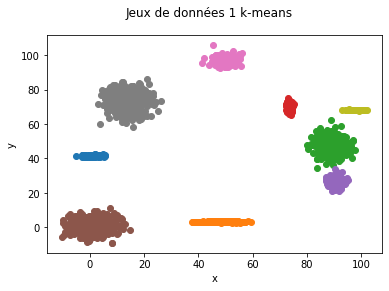

In [243]:
xaxis=[]
yaxis=[]
color = []
fig = plt.figure()
qx = fig.add_subplot(111)
for i in data[0]:
    if i[2] not in color:
        color.append(i[2])
for j in color:
    for i in data[0]:
        if (i[2] == j):
            xaxis.append(i[0])
            yaxis.append(i[1])
    qx.scatter(xaxis, yaxis)
    xaxis = []
    yaxis = []
fig.suptitle('Jeux de données 1 k-means')
plt.xlabel('x')
plt.ylabel('y')

In [244]:
# Extract the point coordinates
X = []
for i in data[0]:
    X.append([i[0], i[1]])

In [245]:
# Find the number of clusters
labels = []
for i in data[0]:
    labels.append(i[2])
n_clusters = len(np.unique(labels))

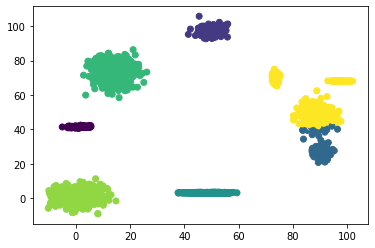

In [262]:
#Kmeans
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=7, n_init=2)
labels = kmeans.fit_predict(reduced_data)

xdata = []
ydata = []
for i in data[0]:
    xdata.append(i[0])
    ydata.append(i[1])

plt.scatter(xdata, ydata, c = labels)

In [9]:
# Determining the good number of clusters
def find_cluster_while(X, methode, linkage = None):
    find1 = False
    find2 =  False
    value_compared1 = 0
    nb_clusters= 2
    cluster_find1 = 0
    value_compared2 = 100
    cluster_find2 = 0
    while not(find1) and not(find2):
        if methode == "Kmeans":
            reduced_data = PCA(n_components=2).fit_transform(X)
            kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
            labels = kmeans.fit_predict(reduced_data)
        elif methode == "Agglomerative":
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=linkage, compute_distances=True)
            clustering = ward.fit(X)
            labels = clustering.labels_
        value1 = davies_bouldin_score(X, labels)
        value2 = metrics.silhouette_score(X, labels, metric='euclidean')
        if not(find1) and value1 <= value_compared1:
            value_compared1 = value1
        elif not(find1):
            find1 = True
            cluster_find1 = nb_clusters
        if not(find2) and value2 <= value_compared2:
            value_compared1 = value1
        elif not(find2):
            find2 = True
            cluster_find2 = nb_clusters
        nb_clusters += 1
    return value1, cluster_find1, value2, cluster_find2

def find_cluster_for(X, methode, linkage =None):
    nb_clusters = 2
    find1 = False
    find2 =  False
    value_compared1 = 0
    cluster_find1 = 0
    value_compared2 = 100
    cluster_find2 = 0
    for i in range(2,20):
        if methode == "Kmeans":
            reduced_data = PCA(n_components=2).fit_transform(X)
            kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
            labels = kmeans.fit_predict(reduced_data)
        elif methode == "Agglomerative":
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=linkage, compute_distances=True)
            clustering = ward.fit(X)
            labels = clustering.labels_
        value1 = davies_bouldin_score(X, labels)
        value2 = metrics.silhouette_score(X, labels, metric='euclidean')
        if not(find1) and value1 <= value_compared1:
            value_compared1 = value1
        elif not(find1):
            find1 = True
            cluster_find1 = nb_clusters
        if not(find2) and value2 <= value_compared2:
            value_compared1 = value1
        elif not(find2):
            find2 = True
            cluster_find2 = nb_clusters
        nb_clusters += 1
    return value1, cluster_find1, value2, cluster_find2

## Scores k-means

In [10]:
# davies bouldin, while
def find_number_clusters_while(X):
    find = False
    value_compared = 100
    nb_clusters= 2
    count = 0
    tps1 = time.time()
    while count <6:
        reduced_data = PCA(n_components=2).fit_transform(X)
        kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
        labels = kmeans.fit_predict(reduced_data)
        value = davies_bouldin_score(X, labels)
        if value <= value_compared:
            value_compared = value
            clusters = nb_clusters
            count = 0
        else:
            count += 1
        nb_clusters += 1
    tps2 = time.time()
    print("Davies bouldin: ")
    print("Score %.3f:" % value_compared)
    print("Clusters %d:" % clusters)
    print("Time elapsed: %.3f s\n" % (tps2-tps1))

    # silhouette, while
    find = False
    value_compared = -2
    nb_clusters= 2
    count = 0
    tps1 = time.time()
    while count<6:
        reduced_data = PCA(n_components=2).fit_transform(X)
        kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
        labels = kmeans.fit_predict(reduced_data)
        value = metrics.silhouette_score(X, labels, metric='euclidean')
        if value >= value_compared:
            value_compared = value
            clusters = nb_clusters
            count = 0
        else:
            count += 1
        nb_clusters += 1
    tps2 = time.time()
    print("Silhouette: ")
    print("Score %.3f:" % value_compared)
    print("Clusters %d:" % clusters)
    print("Time elapsed: %.3f s\n" % (tps2-tps1))
find_number_clusters_while(X)

Davies bouldin: 
Score 0.501:
Clusters 5:
Time elapsed: 0.818 s

Silhouette: 
Score 0.654:
Clusters 5:
Time elapsed: 18.454 s



In [11]:
# davies bouldin, for
def find_number_clusters_for(X):
    nb_clusters = 2
    value_compared = 100
    tps1 = time.time()
    for i in range(2,20):
        reduced_data = PCA(n_components=2).fit_transform(X)
        kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
        labels = kmeans.fit_predict(reduced_data)
        value = davies_bouldin_score(X, labels)
        if value <= value_compared:
            value_compared = value
            cluster_find  = i
        nb_clusters += 1
    tps2 = time.time()
    print("Davies bouldin: ")
    print("Score %.3f:" % value_compared)
    print("Clusters %d:" % cluster_find)
    print("Time elapsed: %.3f s\n" % (tps2-tps1))

    # silhouette, for
    nb_clusters = 2
    value_compared = -2
    tps1 = time.time()
    for i in range(2,20):
        reduced_data = PCA(n_components=2).fit_transform(X)
        kmeans = KMeans(init="k-means++", n_clusters= nb_clusters, n_init=6)
        labels = kmeans.fit_predict(reduced_data)
        value = metrics.silhouette_score(X, labels, metric='euclidean')
        if value >= value_compared:
            value_compared = value
            cluster_find  = i
        nb_clusters += 1
    tps2 = time.time()
    print("Silhouette: ")
    print("Score %.3f:" % value_compared)
    print("Clusters %d:" % cluster_find)
    print("Time elapsed: %.3f s\n" % (tps2-tps1))
find_number_clusters_for(X)


Davies bouldin: 
Score 0.501:
Clusters 5:
Time elapsed: 1.867 s

Silhouette: 
Score 0.654:
Clusters 5:
Time elapsed: 30.994 s



In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Agglomerative clustering

### Jeux de données convexes

In [229]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/D31.arff','r'))

In [123]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-4c-no4.arff','r'))

In [181]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-10c.arff','r'))

### Jeux de données concaves

In [107]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2sp2glob.arff','r'))

In [11]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/3-spiral.arff','r'))

In [144]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/compound.arff','r'))

Text(0, 0.5, 'y')

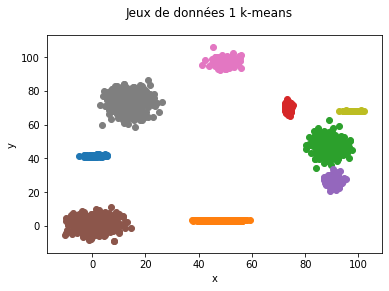

In [12]:
xaxis=[]
yaxis=[]
color = []
fig = plt.figure()
qx = fig.add_subplot(111)
for i in data[0]:
    if i[2] not in color:
        color.append(i[2])
for j in color:
    for i in data[0]:
        if (i[2] == j):
            xaxis.append(i[0])
            yaxis.append(i[1])
    qx.scatter(xaxis, yaxis)
    xaxis = []
    yaxis = []
fig.suptitle('Jeux de données 1 k-means')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
# Extract the point coordinates
X = []
for i in data[0]:
    X.append([i[0], i[1]])

In [14]:
# Find the number of clusters
labels = []
for i in data[0]:
    labels.append(i[2])
n_clusters = len(np.unique(labels))

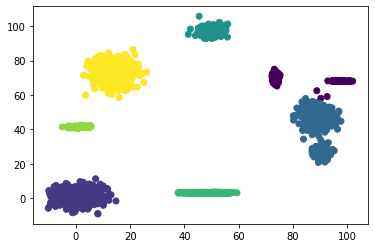

In [264]:
# Clustering agglomératif
ward = AgglomerativeClustering(n_clusters=7, linkage='average')
clustering = ward.fit(X)

xdata = []
ydata = []
for i in data[0]:
    xdata.append(i[0])
    ydata.append(i[1])

plt.scatter(xdata, ydata, c = clustering.labels_)


In [194]:
plot_dendrogram(clustering, truncate_mode='level', p=4)

NameError: name 'plot_dendrogram' is not defined

In [62]:
def find_number_clusters_agglomerative(X):
    linkage = ['single', 'average', 'complete', 'ward']
    for c in linkage:
        print("Combinaison: %s\n" % c)
        # davies boulding, while
        find = False
        nb_clusters = 2
        value_compared = 100
        count = 0
        tps1 = time.time()
        while count < 6:
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=c)
            clustering = ward.fit(X)
            value = davies_bouldin_score(X, clustering.labels_)
            if value <= value_compared:
                value_compared = value
                cluster = nb_clusters
            else:
                count += 1
            nb_clusters += 1
        tps2 = time.time()
        print("Davies bouldin: ")
        print("Score %.3f:" % value_compared)
        print("Clusters %d:" % cluster)
        print("Time elapsed: %.3f s\n" % (tps2-tps1))

        # silhouette, while
        find = False
        nb_clusters = 2
        value_compared = -2
        count = 0
        tps1 = time.time()
        while count<6:
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=c)
            clustering = ward.fit(X)
            value = metrics.silhouette_score(X, clustering.labels_, metric='euclidean')
            if value >= value_compared:
                value_compared = value
                cluster = nb_clusters
            else:
                count += 1
            nb_clusters += 1
        tps2 = time.time()
        print("Silhouette: ")
        print("Score %.3f:" % value_compared)
        print("Clusters %d:" % cluster)
        print("Time elapsed: %.3f s\n" % (tps2-tps1))

        # davies bouldin, for
        find = False
        nb_clusters = 2
        value_compared = 100
        tps1 = time.time()
        for i in range(2,30):
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=c)
            clustering = ward.fit(X)
            value = davies_bouldin_score(X, clustering.labels_)
            if value <= value_compared:
                value_compared = value
                cluster_find  = i
            nb_clusters += 1
        tps2 = time.time()
        print("Davies bouldin: ")
        print("Score %.3f:" % value_compared)
        print("Clusters %d:" % cluster_find)
        print("Time elapsed: %.3f s\n" % (tps2-tps1))


        # silhouette, for
        find = False
        nb_clusters = 2
        value_compared = -2
        tps1 = time.time()
        for i in range(2,30):
            ward = AgglomerativeClustering(n_clusters=nb_clusters, linkage=c)
            clustering = ward.fit(X)
            value = metrics.silhouette_score(X, clustering.labels_, metric='euclidean')
            if value >= value_compared:
                value_compared = value
                cluster_find  = nb_clusters
            nb_clusters += 1
        tps2 = time.time()
        print("Silhouette: ")
        print("Score %.3f:" % value_compared)
        print("Clusters %d:" % cluster_find)
        print("Time elapsed: %.3f s\n" % (tps2-tps1))

find_number_clusters_agglomerative(X)

Combinaison: single

Davies bouldin: 
Score 0.818:
Clusters 34:
Time elapsed: 0.355 s

Silhouette: 
Score 0.311:
Clusters 2:
Time elapsed: 0.101 s

Davies bouldin: 
Score 0.937:
Clusters 27:
Time elapsed: 0.257 s

Silhouette: 
Score 0.311:
Clusters 2:
Time elapsed: 0.403 s

Combinaison: average

Davies bouldin: 
Score 0.827:
Clusters 11:
Time elapsed: 0.183 s

Silhouette: 
Score 0.606:
Clusters 19:
Time elapsed: 0.470 s

Davies bouldin: 
Score 0.749:
Clusters 24:
Time elapsed: 0.378 s

Silhouette: 
Score 0.613:
Clusters 29:
Time elapsed: 0.514 s

Combinaison: complete

Davies bouldin: 
Score 0.819:
Clusters 13:
Time elapsed: 0.212 s

Silhouette: 
Score 0.591:
Clusters 23:
Time elapsed: 0.570 s

Davies bouldin: 
Score 0.816:
Clusters 29:
Time elapsed: 0.427 s

Silhouette: 
Score 0.594:
Clusters 29:
Time elapsed: 0.645 s

Combinaison: ward

Davies bouldin: 
Score 0.861:
Clusters 12:
Time elapsed: 0.157 s

Silhouette: 
Score 0.601:
Clusters 11:
Time elapsed: 0.338 s

Davies bouldin: 
Scor

# DBSCAN

### Jeux de données convexes

In [169]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-10c.arff','r'))
datano = 1

In [82]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-20c-no0.arff','r'))
datano = 2

In [99]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-4c-no4.arff','r'))
datano = 3

### Jeux de données concaves

In [196]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2sp2glob.arff','r'))
datano = 4

In [148]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/3-spiral.arff','r'))
datano = 5

In [158]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/compound.arff','r'))
datano = 6

Text(0, 0.5, 'y')

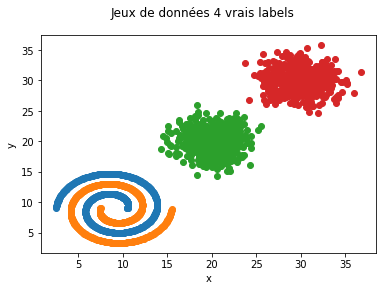

In [197]:
xaxis=[]
yaxis=[]
color = []
fig = plt.figure()
qx = fig.add_subplot(111)
for i in data[0]:
    if i[2] not in color:
        color.append(i[2])
for j in color:
    for i in data[0]:
        if (i[2] == j):
            xaxis.append(i[0])
            yaxis.append(i[1])
    qx.scatter(xaxis, yaxis)
    xaxis = []
    yaxis = []
fig.suptitle('Jeux de données %d vrais labels' % datano)
plt.xlabel('x')
plt.ylabel('y')

In [198]:
# Extract the point coordinates
X = []
for i in data[0]:
    X.append([i[0], i[1]])

In [199]:
# Find the number of clusters
labels = []
for i in data[0]:
    labels.append(i[2])
n_clusters = len(np.unique(labels))
n_clusters

4

{0, 1, 2, 3, -1}
4
{0, 1, 2, 3, -1}
<class 'numpy.ndarray'>


NameError: name 'datano' is not defined

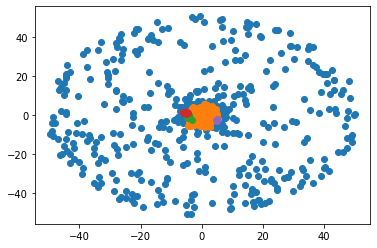

In [175]:
# DBSCAN
eps = 1.6
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

print(set(clustering.labels_))
n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
print(n_clusters)
print(set(clustering.labels_))
print(type(clustering.labels_))

fig = plt.figure()
qx = fig.add_subplot(111)
for j in range(-1, n_clusters+1):
    xaxis = []
    yaxis = []
    for i in range(0, len(X)):
        if clustering.labels_[i] == j:
            xaxis.append(X[i][0])
            yaxis.append(X[i][1])
        
    qx.scatter(xaxis, yaxis)
fig.suptitle('Jeux de données %d DBSCAN\n eps=%.1f    min_samples = %d' % (datano, eps,min_samples))
plt.xlabel('x')
plt.ylabel('y')

In [123]:
# DBSCAN optimal

# davies bouldin
print("Score based on davies bouldin")
value_compared = 100
value = 0
eps_find = 0
min_sample_find = 0
n_clusters = 0
tp1 = time.time()
for eps in np.linspace(0.5,5, 10):
    for min_samples in range(1,10):
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            value = davies_bouldin_score(X, clustering.labels_)
            if value < value_compared:
                value_compared = value
                eps_find = eps
                min_sample_find = min_samples
tp2 = time.time()
print(value_compared)          
print(eps_find)
print(min_sample_find)
print("Time elapsed: %.3f" % (tp2-tp1))

# silhouette
print("\nScore based on silhouette")
value_compared = -2
value = 0
eps_find = 0
min_sample_find = 0
n_clusters = 0
tp1 = time.time()
for eps in np.linspace(1,5, 10):
    for min_samples in range(1,10):
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            value = metrics.silhouette_score(X, clustering.labels_, metric='euclidean')
            if value > value_compared:
                value_compared = value
                eps_find = eps
                min_sample_find = min_samples
tp2 = time.time()
print(value_compared)          
print(eps_find)
print(min_sample_find)
print("Time elapsed: %.3f" % (tp2-tp1))

Score based on davies bouldin
0.0640846382682913
0.5
1
Time elapsed: 1.569

Score based on silhouette
0.5360840676784996
5.0
1
Time elapsed: 1.368


# HDBSCAN

In [62]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-10c.arff','r'))
datano = 1

In [71]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-20c-no0.arff','r'))
datano = 2

In [78]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2d-4c-no4.arff','r'))
datano = 3

### Jeux de données concaves

In [85]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/2sp2glob.arff','r'))
datano = 4

In [90]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/3-spiral.arff','r'))
datano = 5

In [97]:
data = arff.loadarff(open('src/main/resources/datasets/artificial/compound.arff','r'))
datano = 6

In [98]:
# Extract the point coordinates
X = []
for i in data[0]:
    X.append([i[0], i[1]])

In [99]:
# Find the number of clusters
labels = []
for i in data[0]:
    labels.append(i[2])
n_clusters = len(np.unique(labels))
n_clusters

6

{0, 1}
2
800


NameError: name 'datano' is not defined

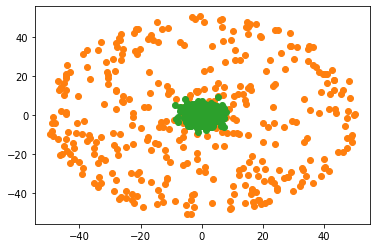

In [190]:
min_cluster_size = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples = min_samples)
cluster_labels = clusterer.fit_predict(X)

print(set(cluster_labels))
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(n_clusters)
print(len(X))

fig = plt.figure()
qx = fig.add_subplot(111)
for j in range(-1, n_clusters+1):
    xaxis = []
    yaxis = []
    for i in range(0, len(X)):
        if cluster_labels[i] == j:
            xaxis.append(X[i][0])
            yaxis.append(X[i][1])
            
    qx.scatter(xaxis, yaxis)
fig.suptitle('Jeux de données %d HDBSCAN\n min_cluster_size=%d    min_samples = %d' % (datano, min_cluster_size,min_samples))
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
dim = len(X[0])
reduced_data = PCA(n_components=dim).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=3)
labels = kmeans.fit_predict(reduced_data)

print(type(labels))
print(labels)


In [101]:
# HDBSCAN optimal

print("Davies bouldin")
value_compared = 100
value = 0
min_samples_found = 0
min_cluster_size_found = 0
n_clusters = 0
tp1 = time.time()
for min_cluster in range(2,10):
    for min_samples in range(3,10):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, min_samples = min_samples)
        labels = clusterer.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters != 0:
            value = davies_bouldin_score(X, labels)
            if value < value_compared:
                value_compared = value
                min_cluster_size_found = min_cluster
                min_samples_found = min_samples
tp2 = time.time()
print(value_compared)
print("min_cluster_size: %d" % min_cluster_size_found)
print("min_samples: %d " % min_samples_found)
print("Time elapsed: %.3f\n" % (tp2-tp1))

print("Silhouette")
value_compared = -2
value = 0
min_samples_found = 0
min_cluster_size_found = 0
n_clusters = 0
tp1 = time.time()
for min_cluster in range(2,10):
    for min_samples in range(3,10):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, min_samples = min_samples)
        labels = clusterer.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters != 0:
            value = metrics.silhouette_score(X, labels, metric='euclidean')
            if value > value_compared:
                value_compared = value
                min_cluster_size_found = min_cluster
                min_samples_found = min_samples
tp2 = time.time()
print(value_compared)
print("min_cluster_size: %d" % min_cluster_size_found)
print("min_samples: %d" % min_samples_found)

print("Time elapsed: %.3f" % (tp2-tp1))

Davies bouldin
2.353634580777435
min_cluster_size: 2
min_samples: 9 
Time elapsed: 0.554

Silhouette
0.5146037873565524
min_cluster_size: 2
min_samples: 7
Time elapsed: 0.656


# Methodes pour la deuxième partie

In [263]:
#K-means
def kmeans(X, nbclusters):
    reduced_data = PCA(n_components=2).fit_transform(X)
    kmeans = KMeans(init="k-means++", n_clusters=nbclusters, n_init=2)
    labels = kmeans.fit_predict(reduced_data)
    
    xdata = []
    ydata = []
    zdata = []
    for i in data:
        xdata.append(i[0])
        ydata.append(i[1])
        if len(X[0]) == 3:
            zdata.append(i[2])
            

    if len(X[0]) == 2:
        plt.scatter(xdata, ydata, c = labels)
    elif len(X[0]) == 3:
        ax = plt.axes(projection='3d')
        ax.scatter(xdata, ydata, zdata, c = labels); 

In [305]:
# Clustering agglomératif
def agglomerative(X, nbclusters, linkage):
    ward = AgglomerativeClustering(n_clusters=nbclusters, linkage=linkage)
    clustering = ward.fit(X)
    
    xdata = []
    ydata = []
    zdata = []
    for i in data:
        xdata.append(i[0])
        ydata.append(i[1])
        if len(X[0]) == 3:
            zdata.append(i[2])
    
    if len(X[0]) == 2:
        plt.scatter(xdata, ydata, c = clustering.labels_)
    elif len(X[0]) == 3:
        ax = plt.axes(projection='3d')
        ax.scatter(xdata, ydata, zdata, c = clustering.labels_)

In [124]:
# DBSCAN optimal

# davies bouldin
def dbscan_optimal(X):
    print("Score based on davies bouldin")
    value_compared = 100
    value = 0
    eps_find = 0
    min_sample_find = 0
    n_clusters = 0
    tp1 = time.time()
    for eps in np.linspace(0.5,5, 10):
        for min_samples in range(1,10):
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = clustering.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                value = davies_bouldin_score(X, clustering.labels_)
                if value < value_compared:
                    value_compared = value
                    eps_find = eps
                    min_sample_find = min_samples
    tp2 = time.time()
    print(value_compared)          
    print(eps_find)
    print(min_sample_find)
    print("Time elapsed: %.3f" % (tp2-tp1))

    # silhouette
    print("\nScore based on silhouette")
    value_compared = -2
    value = 0
    eps_find = 0
    min_sample_find = 0
    n_clusters = 0
    tp1 = time.time()
    for eps in np.linspace(1,5, 10):
        for min_samples in range(1,30):
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = clustering.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                value = metrics.silhouette_score(X, clustering.labels_, metric='euclidean')
                if value > value_compared:
                    value_compared = value
                    eps_find = eps
                    min_sample_find = min_samples
    tp2 = time.time()
    print(value_compared)          
    print(eps_find)
    print(min_sample_find)
    print("Time elapsed: %.3f" % (tp2-tp1))

In [314]:
# DBSCAN
def dbscan(X, eps, min_samples):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    xdata = []
    ydata = []
    zdata = []
    for i in data:
        xdata.append(i[0])
        ydata.append(i[1])
        zdata.append(i[2])
    
    ax = plt.axes(projection='3d')
    ax.scatter(xdata, ydata, zdata, c = clustering.labels_)
    print(len(set(clustering.labels_)))
            

In [126]:
# HDBSCAN optimal

def hdbscan_optimal (X):
    print("Davies bouldin")
    value_compared = 100
    value = 0
    min_samples_found = 0
    min_cluster_size_found = 0
    n_clusters = 0
    tp1 = time.time()
    for min_cluster in range(2,10):
        for min_samples in range(3,10):
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, min_samples = min_samples)
            labels = clusterer.fit_predict(X)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters != 0:
                value = davies_bouldin_score(X, labels)
                if value < value_compared:
                    value_compared = value
                    min_cluster_size_found = min_cluster
                    min_samples_found = min_samples
    tp2 = time.time()
    print(value_compared)
    print("min_cluster_size: %d" % min_cluster_size_found)
    print("min_samples: %d " % min_samples_found)
    print("Time elapsed: %.3f\n" % (tp2-tp1))

    print("Silhouette")
    value_compared = -2
    value = 0
    min_samples_found = 0
    min_cluster_size_found = 0
    n_clusters = 0
    tp1 = time.time()
    for min_cluster in range(2,10):
        for min_samples in range(3,10):
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster, min_samples = min_samples)
            labels = clusterer.fit_predict(X)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters != 0:
                value = metrics.silhouette_score(X, labels, metric='euclidean')
                if value > value_compared:
                    value_compared = value
                    min_cluster_size_found = min_cluster
                    min_samples_found = min_samples
    tp2 = time.time()
    print(value_compared)
    print("min_cluster_size: %d" % min_cluster_size_found)
    print("min_samples: %d" % min_samples_found)

    print("Time elapsed: %.3f" % (tp2-tp1))

In [313]:
def hdbscan_(X, min_cluster_size, min_samples):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples = min_samples)
    cluster_labels = clusterer.fit_predict(X)
        
    xdata = []
    ydata = []
    zdata = []
    for i in data:
        xdata.append(i[0])
        ydata.append(i[1])
        zdata.append(i[2])
        
    ax = plt.axes(projection='3d')
    ax.scatter(xdata, ydata, zdata, c = cluster_labels)
    print(len(set(cluster_labels)))
    

# 2ème partie

### 3D

In [295]:
fileObj = open('dataset/a.data','r')

In [328]:
fileObj = open('dataset/h.data','r')

In [341]:
fileObj = open('dataset/t.data','r')

In [342]:
data = fileObj.read().splitlines()
data = [r.split('\t') for r in data]
data = [[float(a), float(b), float(c)] for (a, b ,c) in data]
data[0]

[1.295428, 0.050829, -0.385217]

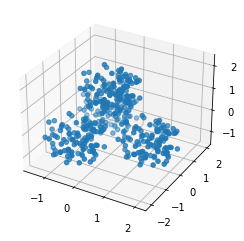

In [343]:
ax = plt.axes(projection='3d')

xdata = []
ydata = []
zdata = []
for i in data:
    xdata.append(i[0])
    ydata.append(i[1])
    zdata.append(i[2])

ax.scatter3D(xdata, ydata, zdata);


In [344]:
# Extract the point coordinates
X = []
for i in data:
    X.append([i[0], i[1], i[2]])

In [345]:
find_number_clusters_while(X)

Davies bouldin: 
Score 0.899:
Clusters 4:
Time elapsed: 0.294 s

Silhouette: 
Score 0.409:
Clusters 4:
Time elapsed: 0.271 s



In [346]:
find_number_clusters_for(X)

Davies bouldin: 
Score 0.893:
Clusters 4:
Time elapsed: 0.634 s

Silhouette: 
Score 0.410:
Clusters 4:
Time elapsed: 0.705 s



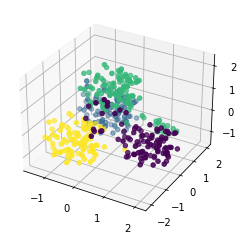

In [347]:
kmeans(X, 4)

In [348]:
find_number_clusters_agglomerative(X)

Combinaison: single

Davies bouldin: 
Score 0.680:
Clusters 2:
Time elapsed: 0.029 s

Silhouette: 
Score 0.133:
Clusters 2:
Time elapsed: 0.054 s

Davies bouldin: 
Score 0.680:
Clusters 2:
Time elapsed: 0.195 s

Silhouette: 
Score 0.133:
Clusters 2:
Time elapsed: 0.151 s

Combinaison: average

Davies bouldin: 
Score 0.666:
Clusters 4:
Time elapsed: 0.038 s

Silhouette: 
Score 0.505:
Clusters 4:
Time elapsed: 0.056 s

Davies bouldin: 
Score 0.666:
Clusters 4:
Time elapsed: 0.171 s

Silhouette: 
Score 0.505:
Clusters 4:
Time elapsed: 0.184 s

Combinaison: complete

Davies bouldin: 
Score 0.676:
Clusters 4:
Time elapsed: 0.051 s

Silhouette: 
Score 0.501:
Clusters 4:
Time elapsed: 0.059 s

Davies bouldin: 
Score 0.676:
Clusters 4:
Time elapsed: 0.226 s

Silhouette: 
Score 0.501:
Clusters 4:
Time elapsed: 0.224 s

Combinaison: ward

Davies bouldin: 
Score 0.688:
Clusters 4:
Time elapsed: 0.060 s

Silhouette: 
Score 0.495:
Clusters 4:
Time elapsed: 0.064 s

Davies bouldin: 
Score 0.688:
Clu

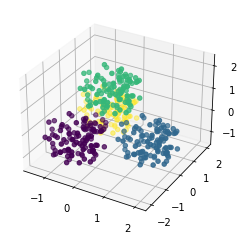

In [350]:
agglomerative(X, 4, 'ward')

In [351]:
dbscan_optimal(X)

Score based on davies bouldin
1.1946624422458498
0.5
7
Time elapsed: 0.365

Score based on silhouette
-2
0
0
Time elapsed: 0.968


2


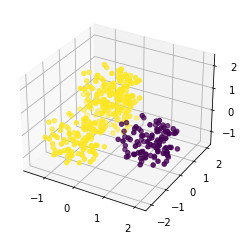

In [354]:
dbscan(X, 0.5, 7)

In [355]:
hdbscan_optimal (X)

Davies bouldin
1.492723042832184
min_cluster_size: 3
min_samples: 7 
Time elapsed: 0.521

Silhouette
0.4398045506347541
min_cluster_size: 2
min_samples: 3
Time elapsed: 0.733


6


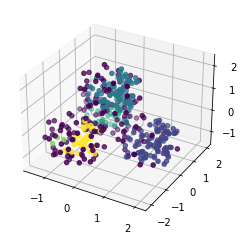

In [359]:
hdbscan_(X, 3, 7)

### 2D

In [289]:
fileObj = open('dataset/tr.data','r')

In [14]:
fileObj = open('dataset/zgn.data','r')

In [45]:
fileObj = open('dataset/zgo.data','r')

In [290]:
data = fileObj.read().splitlines()
data = [r.split(' ') for r in data]
data = [[float(a), float(b)] for (a, b) in data]
data[0]

[-2.02802378232761, -2.033940380944]

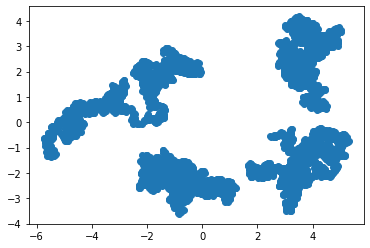

In [291]:
xdata = []
ydata = []
for i in data:
    xdata.append(i[0])
    ydata.append(i[1])

fig = plt.figure()
qx = fig.add_subplot(111)
qx.scatter(xdata, ydata)

In [292]:
# Extract the point coordinates
X = []
for i in data:
    X.append([i[0], i[1]])

In [293]:
find_number_clusters_while(X)

Davies bouldin: 
Score 0.501:
Clusters 5:
Time elapsed: 0.729 s

Silhouette: 
Score 0.654:
Clusters 5:
Time elapsed: 17.807 s



In [50]:
find_number_clusters_for(X)

Davies bouldin: 
Score 0.455:
Clusters 12:
Time elapsed: 0.443 s

Silhouette: 
Score 0.686:
Clusters 10:
Time elapsed: 0.463 s



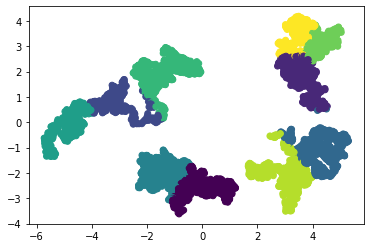

In [294]:
kmeans(X, 10)

In [21]:
find_number_clusters_agglomerative(X)

Combinaison: single

Davies bouldin: 
Score 0.589:
Clusters 3:
Time elapsed: 0.032 s

Silhouette: 
Score 0.199:
Clusters 2:
Time elapsed: 0.031 s

Davies bouldin: 
Score 0.589:
Clusters 3:
Time elapsed: 0.131 s

Silhouette: 
Score 0.199:
Clusters 2:
Time elapsed: 0.114 s

Combinaison: average

Davies bouldin: 
Score 0.575:
Clusters 7:
Time elapsed: 0.032 s

Silhouette: 
Score 0.574:
Clusters 7:
Time elapsed: 0.032 s

Davies bouldin: 
Score 0.556:
Clusters 26:
Time elapsed: 0.132 s

Silhouette: 
Score 0.574:
Clusters 7:
Time elapsed: 0.132 s

Combinaison: complete

Davies bouldin: 
Score 0.713:
Clusters 2:
Time elapsed: 0.027 s

Silhouette: 
Score 0.566:
Clusters 9:
Time elapsed: 0.049 s

Davies bouldin: 
Score 0.584:
Clusters 28:
Time elapsed: 0.168 s

Silhouette: 
Score 0.566:
Clusters 9:
Time elapsed: 0.107 s

Combinaison: ward

Davies bouldin: 
Score 0.592:
Clusters 8:
Time elapsed: 0.027 s

Silhouette: 
Score 0.574:
Clusters 8:
Time elapsed: 0.031 s

Davies bouldin: 
Score 0.592:
C